Normalized v1: [0.5547002  0.83205029]
Normalized v2: [ 0.9701425  -0.24253563]


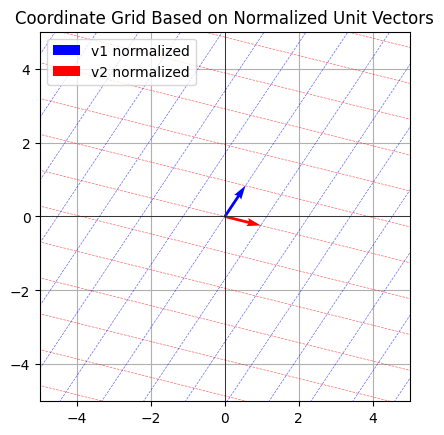

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_vector(v):
    """Normalizes a given vector."""
    norm = np.linalg.norm(v)
    if norm == 0:
        return v  # Avoid division by zero for zero vectors
    return v / norm

def plot_coordinate_grid(v1, v2, grid_size=5, num_points=20):
    """
    Plots a coordinate grid based on two unit vectors (versors).

    Parameters:
    v1, v2: np.array
        The two vectors (to be normalized) defining the grid.
    grid_size: int
        Defines the range of the grid in both x and y directions.
    num_points: int
        Number of points in the grid lines.
    """
    # Normalize the input vectors
    v1_normalized = normalize_vector(v1)
    v2_normalized = normalize_vector(v2)

    # Print the normalized vectors
    print(f"Normalized v1: {v1_normalized}")
    print(f"Normalized v2: {v2_normalized}")
    
    # Generate more grid lines outside the visible plot area
    extended_grid_size = grid_size * 2
    
    # Generate points for the grid in terms of normalized v1 and v2
    t = np.linspace(-extended_grid_size, extended_grid_size, num_points)
    
    # Create the grid lines in both directions
    for i in range(-extended_grid_size, extended_grid_size + 1):
        # Grid lines along the v1 direction (blue, dashed, thin)
        start_v1 = i * v2_normalized - extended_grid_size * v1_normalized
        end_v1 = i * v2_normalized + extended_grid_size * v1_normalized
        plt.plot([start_v1[0], end_v1[0]], [start_v1[1], end_v1[1]], 'b--', alpha=0.6, linewidth=0.5)

        # Grid lines along the v2 direction (red, dashed, thin)
        start_v2 = i * v1_normalized - extended_grid_size * v2_normalized
        end_v2 = i * v1_normalized + extended_grid_size * v2_normalized
        plt.plot([start_v2[0], end_v2[0]], [start_v2[1], end_v2[1]], 'r--', alpha=0.6, linewidth=0.5)

    # Plot the vectors themselves
    plt.quiver(0, 0, v1_normalized[0], v1_normalized[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1 normalized')
    plt.quiver(0, 0, v2_normalized[0], v2_normalized[1], angles='xy', scale_units='xy', scale=1, color='red', label='v2 normalized')

    # Set equal scaling and labels
    plt.xlim([-grid_size, grid_size])
    plt.ylim([-grid_size, grid_size])
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.title("Coordinate Grid Based on Normalized Unit Vectors")
    plt.legend()
    plt.show()

# Example: Using non-standard vectors
v1 = np.array([2, 3])  # some arbitrary vector
v2 = np.array([4, -1]) # another arbitrary vector

plot_coordinate_grid(v1, v2)
